In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import healpy as hp
from astropy.coordinates import SkyCoord
import astropy.units as u
import os
import pandas as pd
import gc
import matplotlib.cm as cm
import matplotlib.colors as colors

### Lower Transit Events ###

In [2]:
### Lower transit events ###

data_low = pd.read_json('events_lower_transit.json')

ev_low = data_low[0].to_numpy().astype(int)

### Repeater Events ###

In [3]:
data = pd.read_json('known_clusters_latest.json')
data = data.T

ev = data['eventid']

all_rep_ev = []
all_rep_ev_low = []

repeat_events_upper = []
repeat_events_lower = []

for i in range(len(ev)):
    number_ev = len(ev[i])
    idx_lower = np.where(np.isin(ev_low, ev[i]))[0]
    
    for k in range(len(idx_lower)):
        all_rep_ev_low.append(ev[i][k])
    
    
    #### Keeping repeater sources in lower transit where more than 50% have been detected there #####
    if (2*len(idx_lower) >= number_ev):
        repeat_events_lower.append(ev[i][1])
    else:
        repeat_events_upper.append(ev[i][1])
        
    for j in range(len(ev[i])):
        all_rep_ev.append(ev[i][j])
        
    
repeat_events_upper = np.sort(repeat_events_upper).astype(int)
repeat_events_lower = np.sort(repeat_events_lower).astype(int)
all_rep_ev = np.sort(all_rep_ev).astype(int)
print(len(all_rep_ev))
all_rep_ev_low = np.sort(all_rep_ev_low).astype(int)

##### removing repeaters whose second burst is beyond cat 2 timescale with header info#####

repeat_events_upper = repeat_events_upper[repeat_events_upper < 318353610]
repeat_events_lower = repeat_events_lower[repeat_events_lower < 318353610]
all_rep_ev = all_rep_ev[all_rep_ev < 318353610]
print(len(all_rep_ev))
all_rep_ev_low = all_rep_ev_low[all_rep_ev_low < 318353610]

repeat_events_upper[-1] = 245519493 #### replacing the event id with header localization for that repeater

print(repeat_events_upper)
print(repeat_events_lower)
print(all_rep_ev_low)

1054
854
[ 13401643  18685272  21538821  24648496  26804247  30112019  30465284
  30749404  32158184  35638607  37451017  38776825  40949542  43055069
  43263682  46802190  54752563  59560503  60955229  69262405  72767188
  73033908  77799213  79554990  81130446  84271986  94592755  95416492
  95677738  95822946 101903385 105742638 118315775 138244000 138691968
 140210071 141207429 144650834 144722364 146640911 148108132 148893983
 148957878 161739522 166470978 245519493]
[ 19996675  73676317  94585180 142035059 165123040]
[ 10889573  13401643  19996599  19996675  21841625  23904057  30105524
  30292842  30465284  37338232  52473268  55972189  65300794  65300794
  69841193  69848452  69848458  69975256  70836867  73676317 165123040]


### Upper Transit Events ###

In [4]:
event, RA, RA_err, DEC, DEC_err = np.loadtxt('cat2_localization.txt', unpack=True )

print(len(event))
#### Removing all the lower transit events #####

idx_low = np.where(np.isin(event, ev_low))[0]

print(len(idx_low))

event = np.delete(event, idx_low)
RA = np.delete(RA, idx_low)
DEC = np.delete(DEC, idx_low)

print(len(event))

### Storing repeat upper transit event ids ###

idx_rep_up = np.where(np.isin(event, repeat_events_upper))[0]

###### seperating them with DEC ######

below_70_dec_rep = []
below_70_RA_rep = []

above_70_dec_rep = []
above_70_RA_rep = []


for i in idx_rep_up:
    if DEC[i] > 70:
        above_70_dec_rep.append(DEC[i])
        above_70_RA_rep.append(RA[i])
    else:
        below_70_dec_rep.append(DEC[i])
        below_70_RA_rep.append(RA[i])

event_up_rep = event[idx_rep_up]
RA_up_rep = RA[idx_rep_up]
DEC_up_rep = DEC[idx_rep_up]

#### Removing all repeater events ##########

idx_rep = np.where(np.isin(event, all_rep_ev))[0]

print(len(idx_rep))

event = np.delete(event, idx_rep)
print(len(event))
RA = np.delete(RA, idx_rep)
DEC = np.delete(DEC, idx_rep)


##### Separating one off as per DEC #########

below_70_RA, below_70_dec = [], []
above_70_RA, above_70_dec= [], []

for i in range(len(event)):
    if DEC[i] > 70:
        above_70_RA.append(RA[i])
        above_70_dec.append(DEC[i])
    else:
        below_70_RA.append(RA[i])
        below_70_dec.append(DEC[i])

4859
235
4624
805
3819


### Lower Transit Events ###

In [5]:
#### Doing lowe

one_off_low = []

for i in range(len(ev_low)):
    if ev_low[i] in all_rep_ev:
        print("Repeat event", ev_low[i])
    else:
        one_off_low.append(ev_low[i])
        
one_off_low = np.array(one_off_low).astype(int)

event, RA, RA_err, DEC, DEC_err = np.loadtxt('cat2_localization.txt', unpack=True )


low_one = np.where(np.isin(event, one_off_low))[0]

event_low_one = event[low_one]
RA_low_one = RA[low_one]
DEC_low_one = DEC[low_one]


low_rep = np.where(np.isin(event, repeat_events_lower))[0]

event_low_rep = event[low_rep]
RA_low_rep = RA[low_rep]
DEC_low_rep = DEC[low_rep]

print(len(RA_low_one), len(DEC_low_one))
print(len(RA_low_rep), len(DEC_low_rep))

Repeat event 15707968
Repeat event 19996599
Repeat event 19996675
Repeat event 30105524
Repeat event 37338232
Repeat event 60954679
Repeat event 65300794
Repeat event 65628049
Repeat event 69975256
Repeat event 69975309
Repeat event 69978272
Repeat event 69978377
Repeat event 70836867
Repeat event 73676317
Repeat event 94585180
Repeat event 95360104
Repeat event 142035059
Repeat event 165123040
Repeat event 167591075
Repeat event 173670719
Repeat event 230488717
214 214
5 5


### Book - Keeping and stuff ###

In [6]:
event, RA, RA_err, DEC, DEC_err = np.loadtxt('cat2_localization.txt', unpack=True )

### Full accounts ###

print("Total Number of Events", len(event))
print("Total Number of Repeat Events", len(idx_rep))
print("Total Number of Repeat Events in lower transit", len(all_rep_ev_low))
print("Total Number of Lower transit events", len(ev_low))


### One off below 70 DEC ###

below_70_dec = np.array(below_70_dec).astype(int)
below_70_RA = np.array(below_70_RA).astype(int)

print("### One off below 70 DEC ###", len(below_70_dec), len(below_70_RA))

### Repeater below 70 DEC ###

below_70_dec_rep = np.array(below_70_dec_rep).astype(int)
below_70_RA_rep = np.array(below_70_RA_rep).astype(int)

print("### Repeater below 70 DEC ###",len(below_70_dec_rep), len(below_70_RA_rep))

#### One off above 70 DEC ###

above_70_dec = np.array(above_70_dec).astype(int)
above_70_RA = np.array(above_70_RA).astype(int)

print("#### One off above 70 DEC ###", len(above_70_RA), len(above_70_dec))

#### Repeater above 70 DEC ###

above_70_dec_rep = np.array(above_70_dec_rep).astype(int)
above_70_RA_rep = np.array(above_70_RA_rep).astype(int)

print("#### Repeater above 70 DEC ###", len(above_70_RA_rep), len(above_70_dec_rep))

#### One off lower transit ####

print("#### One off lower transit ####", len(RA_low_one), len(DEC_low_one))

#### Repeater Lower Transit ####

print("#### Repeater Lower Transit ####",len(RA_low_rep), len(DEC_low_rep))



Total Number of Events 4859
Total Number of Repeat Events 805
Total Number of Repeat Events in lower transit 21
Total Number of Lower transit events 235
### One off below 70 DEC ### 3104 3104
### Repeater below 70 DEC ### 37 37
#### One off above 70 DEC ### 715 715
#### Repeater above 70 DEC ### 9 9
#### One off lower transit #### 214 214
#### Repeater Lower Transit #### 5 5


### Upper Transit Map ###

In [7]:
fname_u = "exposure_int_20180828_20230916_transit_U_beam_FWHM-600_res_12s_0.86_arcmin.npz"
fname_l = "exposure_int_20180828_20230916_transit_L_beam_FWHM-600_res_12s_0.86_arcmin.npz"


with np.load(fname_u) as data:
    exposure_u = data["exposure"]

#setting parameters for map resolution 
#spatial
nside = 4096
npix = hp.nside2npix(nside)
#temporal
t_res = 12 

#initializing a healpy map
hpxmap = np.zeros(npix, dtype=np.float64) 
hpxmap[0:len(exposure_u)] += t_res * exposure_u/(3600.) #seconds to hours
hpxmap[hpxmap==0] = hp.UNSEEN #masking pixels with zero exposure

print(np.max(hpxmap))

33992.76777777777


Resolution of new map : 3.44 arcmin


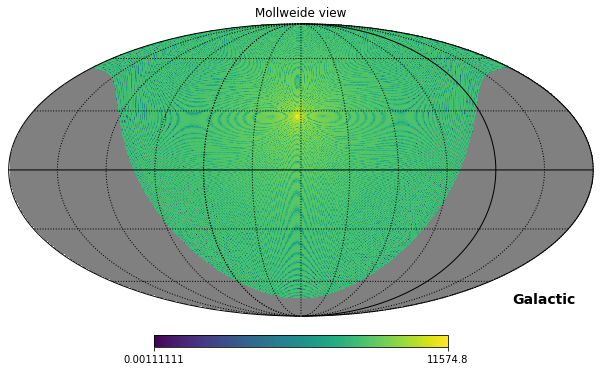

In [8]:
#### The one with full data ####

# plt.figure(figsize=(12, 8))
nside_out = 1024
print ("Resolution of new map : %.2f arcmin"%(hp.nside2resol(nside_out, arcmin=True)))
hpxmap_dg = hp.ud_grade(hpxmap, nside_out) 


# hp.newvisufunc.projview(
#     hpxmap_dg,
#     coord=["C","G"],
#     graticule=True,
#     graticule_labels=True,
#     rot=(120, 0, 0),
#     custom_xtick_labels = [r'-120$^o$', r'180$^o$', r'120$^o$',r'60$^o$', r'0$^o$'],
#     unit="Exposure (hrs)",
#     xlabel="longitude",
#     ylabel="latitude",
#     norm = "log",
#     cb_orientation="horizontal",
#     projection_type="mollweide",
#     cmap = "viridis",
#     xtick_label_color = "red",
# )


hp.mollview(hpxmap_dg, coord=["C", "G"], rot = (120,0,0), norm="log", notext=False)
hp.graticule(label=True)

### Masked Upper Transit Map ###

In [10]:
#### The one with masked data ####

with np.load(fname_u) as data:
    exposure_u = data["exposure"]

#setting parameters for map resolution 
#spatial
nside = 4096
npix = hp.nside2npix(nside)
#temporal
t_res = 12 

#initializing a healpy map
hpxmap = np.zeros(npix, dtype=np.float64) 
hpxmap[0:len(exposure_u)] += t_res * exposure_u/(3600.) #seconds to hours
hpxmap[hpxmap==0] = hp.UNSEEN #masking pixels with zero exposure

all_pixels = np.arange(npix)
theta, phi = hp.pix2ang(nside, all_pixels)

ra = np.degrees(phi)
dec = 90.0 - theta * 180.0 / np.pi


idx_rm = np.where((dec > 70) & (dec <= 90))[0]
hpxmap[idx_rm] = hp.UNSEEN

Resolution of new map : 3.44 arcmin


<Figure size 864x576 with 0 Axes>

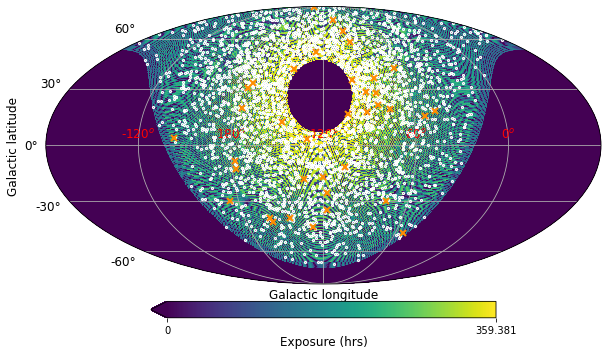

In [50]:
nside_out = 1024
print ("Resolution of new map : %.2f arcmin"%(hp.nside2resol(nside_out, arcmin=True)))
hpxmap_dg = hp.ud_grade(hpxmap, nside_out) 

plt.figure(figsize=(12, 8))



hp.newvisufunc.projview(
    hpxmap_dg,
    coord=["C","G"],
    graticule=True,
    graticule_labels=True,
    rot=(120, 0, 0),
    custom_xtick_labels = [r'-120$^o$', r'180$^o$', r'120$^o$',r'60$^o$', r'0$^o$'],
    unit="Exposure (hrs)",
    xlabel="Galactic longitude",
    ylabel="Galactic latitude",
    norm = "hist",
    cb_orientation="horizontal",
    projection_type="mollweide",
    cmap = "viridis",
    xtick_label_color = "red",
    cbar_ticks = [0, np.max(hpxmap)],
)

thetas = np.radians(90 - below_70_dec)
phis = np.radians(below_70_RA)

rotator = hp.Rotator(rot=(120, 0, 0), coord=["C", "G"])  # Same rotation as the plot
theta_rot, phi_rot = rotator(thetas, phis)

for i in range(len(theta_rot)):
    hp.newvisufunc.newprojplot(theta_rot[i], phi_rot[i], 
                               markerfacecolor='none', markeredgecolor='white', marker='o', markeredgewidth = 1.2, markersize = 2)
    

thetas = np.radians(90 - below_70_dec_rep)
phis = np.radians(below_70_RA_rep)

rotator = hp.Rotator(rot=(120, 0, 0), coord=["C", "G"])  # Same rotation as the plot
theta_rot, phi_rot = rotator(thetas, phis)

for i in range(len(theta_rot)):
    hp.newvisufunc.newprojplot(theta_rot[i], phi_rot[i], 
                               markerfacecolor='none', markeredgecolor='darkorange', marker='x', markeredgewidth = 2)


plt.savefig("Exposure_full_events.pdf", bbox_inches='tight', dpi=300)    
plt.show()

### Upper transit centered map ###

In [51]:
#### Upper transit centered around NCP ######

with np.load(fname_u) as data:
    exposure_u = data["exposure"]

#setting parameters for map resolution 
#spatial
nside = 4096
npix = hp.nside2npix(nside)
#temporal
t_res = 12 

#initializing a healpy map
hpxmap = np.zeros(npix, dtype=np.float64) 
hpxmap[0:len(exposure_u)] += t_res * exposure_u/(3600.) #seconds to hours
hpxmap[hpxmap==0] = hp.UNSEEN #masking pixels with zero exposure

all_pixels = np.arange(npix)
theta, phi = hp.pix2ang(nside, all_pixels)

ra = np.degrees(phi)
dec = 90.0 - theta * 180.0 / np.pi

hpxmap_upper = hpxmap
idx_rm = np.where(dec < 70)[0]
hpxmap_upper[idx_rm] = hp.UNSEEN

print(np.max(hpxmap_upper))

33992.76777777777


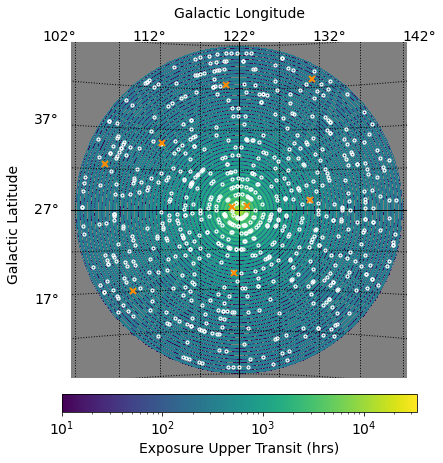

In [59]:
upper_map = hp.gnomview(
    hpxmap_upper,
    rot=(122.93, 27.13),  # Centering the view around NCP
    coord=["C", "G"],  # Transforming from Celestial to Galactic
    title=" ",
    unit=" ",
    min = 10,
    max = np.max(hpxmap_upper),
    xsize=1710,  # Increase resolution
    cmap="viridis",
    norm="log",
    cbar=False, # Show color bar
    notext = True,
    return_projected_map=True,    
)

hp.graticule(dpar=5, dmer=5, coord=["G"])

# for i in range(len(highdec_RAs)):
#     hp.projscatter(highdec_RAs[i], highdec_decs[i], lonlat=True, coord=['C', 'G'], color='white')


# for i in range(len(highdec_rep_RAs)):
#     hp.projscatter(highdec_rep_RAs[i], highdec_rep_decs[i], lonlat=True, coord=['C', 'G'], color='darkorange', marker='x')


thetas = np.radians(90 - above_70_dec)
phis = np.radians(above_70_RA)

rotator = hp.Rotator(rot=(122.93, 27.13, 0), coord=["C", "G"])  # Same rotation as the plot
theta_rot, phi_rot = rotator(thetas, phis)

for i in range(len(theta_rot)):
    hp.newvisufunc.newprojplot(theta_rot[i], phi_rot[i], 
                               markerfacecolor='none', markeredgecolor='white', marker='o', markeredgewidth = 1.2, markersize = 3)
    

thetas = np.radians(90 - above_70_dec_rep)
phis = np.radians(above_70_RA_rep)

rotator = hp.Rotator(rot=(122.93, 27.13, 0), coord=["C", "G"])  # Same rotation as the plot
theta_rot, phi_rot = rotator(thetas, phis)

for i in range(len(theta_rot)):
    hp.newvisufunc.newprojplot(theta_rot[i], phi_rot[i], 
                               markerfacecolor='none', markeredgecolor='darkorange', marker='x', markeredgewidth = 2)


# Get the current figure and axis
fig = plt.gcf()
ax = plt.gca()

# Set Galactic Longitude and Latitude labels manually
ax.text(0, 0.45, 'Galactic Longitude', ha='center', va='top', fontsize=14)
ax.text(-0.5, 0.1, 'Galactic Latitude', ha='center', va='top', fontsize=14, rotation=90)

lon_ticks = np.array([102, 112, 122, 132, 142])  # Galactic longitude ticks
lat_ticks = np.array([17, 27, 37])  # Galactic latitude ticks


# Convert longitude and latitude ticks to radians for the Mollweide projection
lon_ticks_rad = np.array([-0.4, -0.2, 0, 0.2, 0.4]) #np.radians(lon_ticks)
lat_ticks_rad = np.array([-0.2, 0, 0.2])#np.radians(lat_ticks)

# Manually place the longitude tick labels at the bottom of the plot
for lon, lon_rad in zip(lon_ticks, lon_ticks_rad):
    ax.text(lon_rad, 0.4 , f"{lon}°", ha='center', va='top', fontsize=14)

# Manually place the latitude tick labels on the left side of the plot
for lat, lat_rad in zip(lat_ticks, lat_ticks_rad):
    ax.text(-0.4, lat_rad, f"{lat}°", ha='right', va='center', fontsize=14)

    
norm = colors.LogNorm(vmin=10, vmax=np.max(hpxmap_upper))
sm = cm.ScalarMappable(cmap="viridis", norm=norm)
sm.set_array([])  

cbar = plt.colorbar(sm, orientation='horizontal', shrink=1, pad=0.04)
cbar.set_label("Exposure Upper Transit (hrs)", fontsize=14)
cbar.ax.tick_params(labelsize=14)

plt.savefig("Exposure_Upper_events.pdf", bbox_inches='tight', dpi=300)
# Show the plot
plt.show()


### Lower Transit Map ###

11212.787777777778
Resolution of new map : 0.86 arcmin


<Figure size 864x576 with 0 Axes>

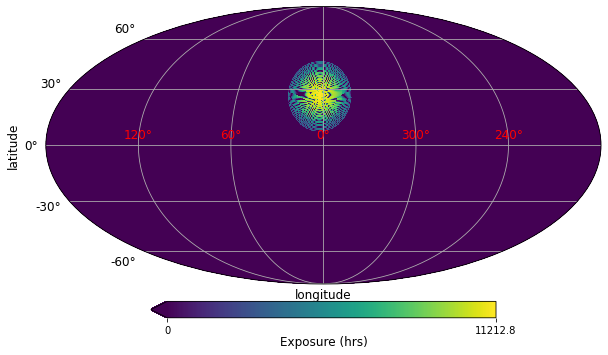

In [60]:
##### Lower transit ####

with np.load(fname_l) as data:
    exposure_l = data["exposure"]

#setting parameters for map resolution 
#spatial
nside = 4096
npix = hp.nside2npix(nside)
#temporal
t_res = 12 

#initializing a healpy map
hpxmap = np.zeros(npix, dtype=np.float64) 
hpxmap[0:len(exposure_l)] += t_res * exposure_l/(3600.) #seconds to hours
hpxmap[hpxmap==0] = hp.UNSEEN #masking pixels with zero exposure

print(np.max(hpxmap))



nside_out = 4096
print ("Resolution of new map : %.2f arcmin"%(hp.nside2resol(nside_out, arcmin=True)))
hpxmap_dg = hp.ud_grade(hpxmap, nside_out) 

plt.figure(figsize=(12, 8))


hp.newvisufunc.projview(
    hpxmap_dg,
    coord=["C","G"],
    graticule=True,
    graticule_labels=True,
    rot=(120, 0, 0),
#     custom_xtick_labels = [r'-120$^o$', r'180$^o$', r'120$^o$',r'60$^o$', r'0$^o$'],
    unit="Exposure (hrs)",
    xlabel="longitude",
    ylabel="latitude",
    norm = "hist",
    cb_orientation="horizontal",
    projection_type="mollweide",
    cmap = "viridis",
    xtick_label_color = "red",
    cbar_ticks = [0, np.max(hpxmap_dg)],
)

### Lower Transit Centered Map ###

Resolution of new map : 3.44 arcmin


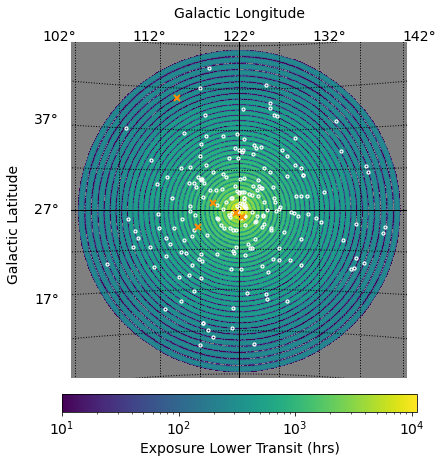

In [63]:

nside_out = 1024
print ("Resolution of new map : %.2f arcmin"%(hp.nside2resol(nside_out, arcmin=True)))
hpxmap_dg = hp.ud_grade(hpxmap, nside_out)

lower_map = hp.gnomview(
    hpxmap_dg,
    rot=(122.93, 27.13),  # Centering the view around NCP
    coord=["C", "G"],  # Transforming from Celestial to Galactic
    title=" ",
    unit=" ",
    min = 10,
    max = np.max(hpxmap_dg),
    xsize=1710,  # Increase resolution
    cmap="viridis",
    norm="log",
    cbar=False, # Show color bar
    notext = True,
    return_projected_map=True,    
)


hp.graticule(dpar=5, dmer=5, coord=["G"])

thetas = np.radians(90 - DEC_low_one)
phis = np.radians(RA_low_one)

rotator = hp.Rotator(rot=(122.93, 27.13, 0), coord=["C", "G"])  # Same rotation as the plot
theta_rot, phi_rot = rotator(thetas, phis)

for i in range(len(theta_rot)):
    hp.newvisufunc.newprojplot(theta_rot[i], phi_rot[i], 
                               markerfacecolor='none', markeredgecolor='white', marker='o', markeredgewidth = 1.2, markersize = 3)
    

thetas = np.radians(90 - DEC_low_rep)
phis = np.radians(RA_low_rep)

rotator = hp.Rotator(rot=(122.93, 27.13, 0), coord=["C", "G"])  # Same rotation as the plot
theta_rot, phi_rot = rotator(thetas, phis)

for i in range(len(theta_rot)):
    hp.newvisufunc.newprojplot(theta_rot[i], phi_rot[i], 
                               markerfacecolor='none', markeredgecolor='darkorange', marker='x', markeredgewidth = 2)

# Get the current figure and axis
fig = plt.gcf()
ax = plt.gca()

# Set Galactic Longitude and Latitude labels manually
ax.text(0, 0.45, 'Galactic Longitude', ha='center', va='top', fontsize=14)
ax.text(-0.5, 0.1, 'Galactic Latitude', ha='center', va='top', fontsize=14, rotation=90)

lon_ticks = np.array([102, 112, 122, 132, 142])  # Galactic longitude ticks
lat_ticks = np.array([17, 27, 37])  # Galactic latitude ticks


lon_ticks_rad = np.array([-0.4, -0.2, 0, 0.2, 0.4]) 
lat_ticks_rad = np.array([-0.2, 0, 0.2])

# Manually place the longitude tick labels
for lon, lon_rad in zip(lon_ticks, lon_ticks_rad):
    ax.text(lon_rad, 0.4 , f"{lon}°", ha='center', va='top', fontsize=14)

# Manually place the latitude tick labels 
for lat, lat_rad in zip(lat_ticks, lat_ticks_rad):
    ax.text(-0.4, lat_rad, f"{lat}°", ha='right', va='center', fontsize=14)

    
norm = colors.LogNorm(vmin=10, vmax=np.max(hpxmap_dg))
sm = cm.ScalarMappable(cmap="viridis", norm=norm)
sm.set_array([])  

cbar = plt.colorbar(sm, orientation='horizontal', shrink=1, pad=0.04)
cbar.set_label("Exposure Lower Transit (hrs)", fontsize=14)
cbar.ax.tick_params(labelsize=14)

plt.savefig("Exposure_lower_events.pdf", bbox_inches='tight', dpi=300)
plt.show()
